In [39]:
import pandas as pd 
import numpy as np 
import sys
import warnings
import itertools
warnings.filterwarnings("ignore")
import statsmodels.api as sm
import statsmodels.tsa.api as smt
import statsmodels.formula.api as smf
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline
import datetime
import calendar
import seaborn as sns

In [57]:
kpiName = 'MoU Overall'
circleName = 'MAHARASHTRA'
howIndiaTalksDf = pd.read_csv('C:/Users/piyush12.kumar/PycharmProjects/fileRead/foreCasting/how_india_talks_[2019-11-01, 2020-02-23].csv')
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['CIRCLE'] == circleName]
howIndiaTalksDf[['First', 'Last']] = howIndiaTalksDf.TIME_STAMP.str.split(" ", expand=True, )
howIndiaTalksDf = howIndiaTalksDf.loc[howIndiaTalksDf['Last'] == "16"]
data = howIndiaTalksDf[['TIME_STAMP', kpiName]]
data.head()


,TIME_STAMP,MoU Overall
380,2019-11-01 16,36557861.15
932,2019-11-02 16,36197072.99
1484,2019-11-03 16,33305300.94
2036,2019-11-04 16,37308981.02
2588,2019-11-05 16,37237728.36


In [58]:
data.describe()

,MoU Overall
count,1.150000e+02
mean,3.842801e+07
std,2.238189e+06
min,3.258526e+07
25%,3.709775e+07
50%,3.842701e+07
75%,3.994886e+07
max,4.297567e+07


In [59]:
data.isnull().sum()

TIME_STAMP     0
MoU Overall    0
dtype: int64

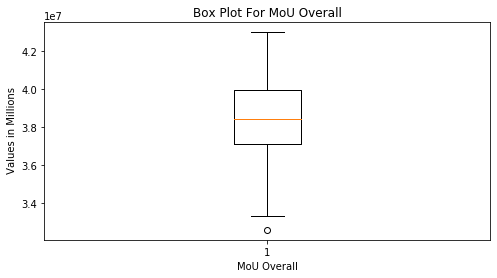

In [60]:
data.columns = [c.replace(' ', '_') for c in data.columns]
plt.figure(figsize=(8,4))
plt.boxplot(data.MoU_Overall)
plt.title('Box Plot For MoU Overall')
plt.xlabel('MoU Overall')
plt.ylabel(' Values in Millions')
plt.show()

In [61]:
data.head()


,TIME_STAMP,MoU_Overall
380,2019-11-01 16,36557861.15
932,2019-11-02 16,36197072.99
1484,2019-11-03 16,33305300.94
2036,2019-11-04 16,37308981.02
2588,2019-11-05 16,37237728.36


In [62]:
data.set_index('TIME_STAMP',inplace=True)

In [63]:
data.head()

,MoU_Overall
TIME_STAMP,
2019-11-01 16,36557861.15
2019-11-02 16,36197072.99
2019-11-03 16,33305300.94
2019-11-04 16,37308981.02
2019-11-05 16,37237728.36


In [66]:
dates = pd.date_range(start='2019-11-01 16:00:00', freq='D', periods=len(data))
dates[0:5]

DatetimeIndex(['2019-11-01 16:00:00', '2019-11-02 16:00:00',
               '2019-11-03 16:00:00', '2019-11-04 16:00:00',
               '2019-11-05 16:00:00'],
              dtype='datetime64[ns]', freq='D')

In [67]:
# data['Year']= dates.year
data['Day']= dates.day
data['Month']= dates.month
data.head()

,MoU_Overall,Day,Month
TIME_STAMP,,,
2019-11-01 16,36557861.15,1,11
2019-11-02 16,36197072.99,2,11
2019-11-03 16,33305300.94,3,11
2019-11-04 16,37308981.02,4,11
2019-11-05 16,37237728.36,5,11


In [68]:
data.describe()

,MoU_Overall,Day,Month
count,1.150000e+02,115.000000,115.000000
mean,3.842801e+07,15.069565,6.773913
std,2.238189e+06,8.632580,5.078439
min,3.258526e+07,1.000000,1.000000
25%,3.709775e+07,8.000000,1.000000
50%,3.842701e+07,15.000000,11.000000
75%,3.994886e+07,22.000000,12.000000
max,4.297567e+07,31.000000,12.000000


In [72]:
data['Month'] = data['Month'].apply(lambda x: calendar.month_abbr[x])
data = data[['Month','Day','MoU_Overall']]

In [73]:
data.head()

,Month,Day,MoU_Overall
TIME_STAMP,,,
2019-11-01 16,Nov,1,36557861.15
2019-11-02 16,Nov,2,36197072.99
2019-11-03 16,Nov,3,33305300.94
2019-11-04 16,Nov,4,37308981.02
2019-11-05 16,Nov,5,37237728.36


# Seasonality – Time Series Decomposition


Decomposition is applied to observe the MoU vary on a day on day basis and to plot a stacked monthly graph to observe seasonality in our data.

In [75]:
daily_specific_hour_mou_data = pd.pivot_table(data, values = "MoU_Overall", columns = "Month", index = "Day")
daily_specific_hour_mou_data

Month,Dec,Feb,Jan,Nov
Day,,,,
1,34347237.40,39542468.28,40756536.92,36557861.15
2,38123039.42,36901056.16,39268689.97,36197072.99
3,37633261.27,41856861.13,39543287.03,33305300.94
4,38054346.19,41112386.37,38774613.04,37308981.02
5,37861858.30,41860226.45,35795181.29,37237728.36
6,37796458.12,41456740.65,40646740.46,37017914.72
7,37276007.63,41677268.55,40269518.87,36842870.51
8,34250307.49,39997997.76,39899722.24,36475451.84
9,38721284.76,36653202.83,39705229.43,34549990.54


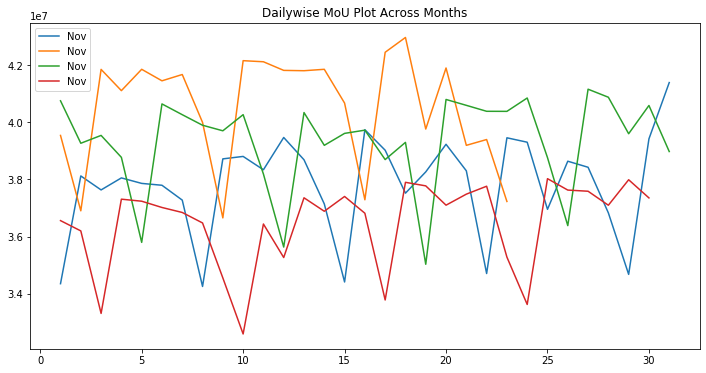

In [76]:
# Lineplot of dailywise MoU across each month
plt.figure(figsize=(12,6))
plt.plot(daily_specific_hour_mou_data)
plt.legend(data['Month'])
plt.title('Dailywise MoU Plot Across Months')
plt.show()

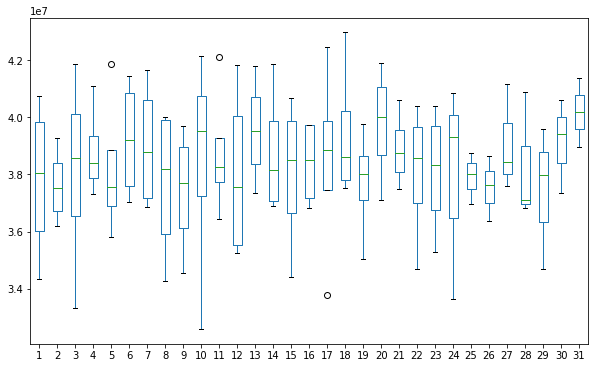

In [77]:

daily_specific_hour_mou_data.T.boxplot(grid=False, figsize=(10,6))
plt.show()

In [87]:
monthly_MoU_data = pd.pivot_table(data, values = "MoU_Overall", columns = "Day", index = "Month")
monthly_MoU_data = monthly_MoU_data[[1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31]]
monthly_MoU_data.reindex(index = [ 'Nov', 'Dec','Jan','Feb'])
monthly_MoU_data

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
Dec,34347237.40,38123039.42,37633261.27,38054346.19,37861858.30,37796458.12,37276007.63,34250307.49,38721284.76,38807018.58,...,34703737.09,39459715.92,39305025.70,36953412.03,38639382.33,38427007.80,36828115.19,34673554.59,39423631.32,41395290.03
Feb,39542468.28,36901056.16,41856861.13,41112386.37,41860226.45,41456740.65,41677268.55,39997997.76,36653202.83,42162425.44,...,39399048.24,37228794.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jan,40756536.92,39268689.97,39543287.03,38774613.04,35795181.29,40646740.46,40269518.87,39899722.24,39705229.43,40270347.51,...,40388428.95,40386305.52,40854075.83,38764999.53,36382308.41,41162680.46,40880855.59,39602323.77,40592439.16,38978357.58
Nov,36557861.15,36197072.99,33305300.94,37308981.02,37237728.36,37017914.72,36842870.51,36475451.84,34549990.54,32585260.19,...,37762676.33,35278740.30,33619982.69,38027651.70,37627819.46,37587103.64,37096697.41,37989656.10,37352865.38,NaN


In [88]:
monthly_MoU_data.reindex(index = [ 'Nov', 'Dec','Jan','Feb'])
monthly_MoU_data

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Month,,,,,,,,,,,,,,,,,,,,,
Dec,34347237.40,38123039.42,37633261.27,38054346.19,37861858.30,37796458.12,37276007.63,34250307.49,38721284.76,38807018.58,...,34703737.09,39459715.92,39305025.70,36953412.03,38639382.33,38427007.80,36828115.19,34673554.59,39423631.32,41395290.03
Feb,39542468.28,36901056.16,41856861.13,41112386.37,41860226.45,41456740.65,41677268.55,39997997.76,36653202.83,42162425.44,...,39399048.24,37228794.62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Jan,40756536.92,39268689.97,39543287.03,38774613.04,35795181.29,40646740.46,40269518.87,39899722.24,39705229.43,40270347.51,...,40388428.95,40386305.52,40854075.83,38764999.53,36382308.41,41162680.46,40880855.59,39602323.77,40592439.16,38978357.58
Nov,36557861.15,36197072.99,33305300.94,37308981.02,37237728.36,37017914.72,36842870.51,36475451.84,34549990.54,32585260.19,...,37762676.33,35278740.30,33619982.69,38027651.70,37627819.46,37587103.64,37096697.41,37989656.10,37352865.38,NaN


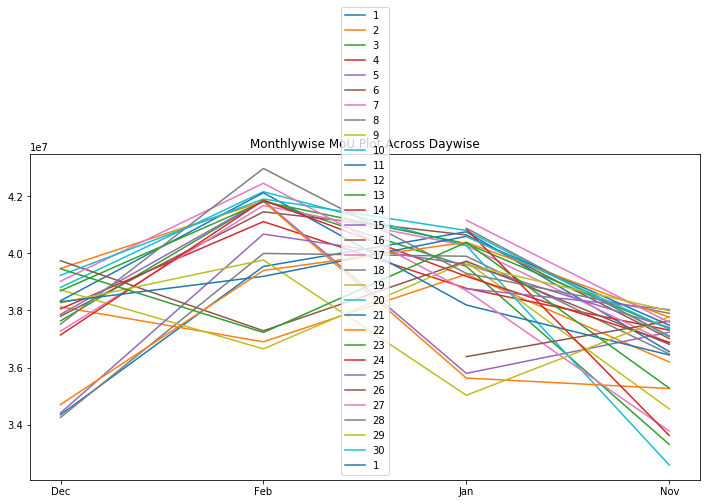

In [97]:

#Lineplot of monthly sales
plt.figure(figsize=(12,6))
plt.plot(monthly_MoU_data)
plt.legend(data['Day'])
plt.title('Monthlywise MoU Plot Across Daywise')
plt.show()

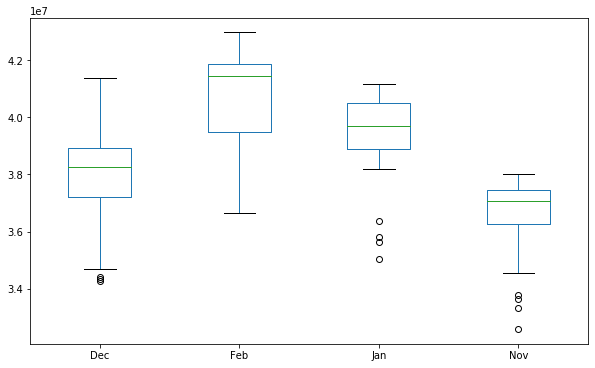

In [90]:
#Boxplot to visualise monthly trend
monthly_MoU_data.T.boxplot(grid=False, figsize=(10,6))
plt.show()

In [91]:
mou_ts = pd.Series(data['MoU_Overall'],index=dates)
mou_ts[0:5]

2019-11-01 16:00:00    36557861.15
2019-11-02 16:00:00    36197072.99
2019-11-03 16:00:00    33305300.94
2019-11-04 16:00:00    37308981.02
2019-11-05 16:00:00    37237728.36
Freq: D, Name: MoU_Overall, dtype: float64

In [92]:
#Multiplicative decomposition of the serie
decomposition = sm.tsa.seasonal_decompose(mou_ts, model='multiplicative')

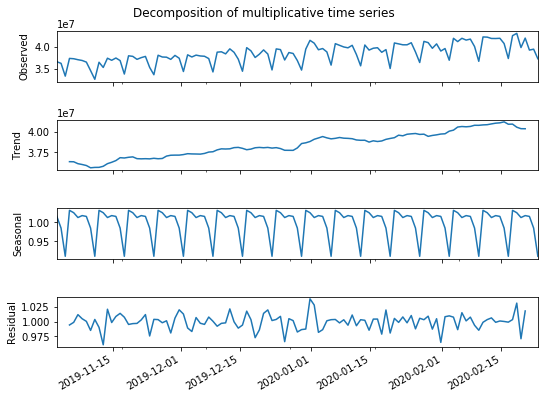

In [93]:
fig = decomposition.plot()
fig.set_figwidth(8)
fig.set_figheight(6)
fig.suptitle('Decomposition of multiplicative time series')
plt.show()

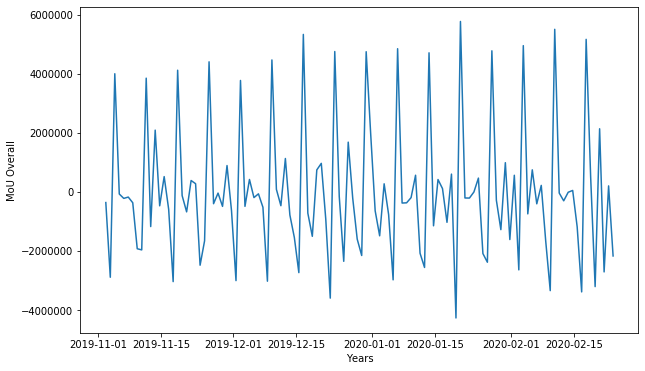

In [96]:
'''
Inference:
1) Trend: 12-months moving average looks non-linear there is increasing and some decreasing values in the pattern.

2) Seasonality: Seasonal plot displays a fairly consistent month-on-month pattern. The monthly seasonal components are average values for a month after removal of trend.
'''

#Differencing once to remove trend
plt.figure(figsize=(10, 6))
plt.plot(mou_ts.diff(periods=1))
plt.xlabel('Years')
plt.ylabel('MoU Overall')
plt.show()